In [248]:
import json
import pandas as pd
import re




rumour_prediction = pd.read_json('github/data/covid_prediction.json')
rumour_prediction = rumour_prediction.T

lines = []
with open('github/data/covid.data.txt') as f:
    lines = f.readlines()
    
    
print(len(rumour_prediction))
print(len(lines))
rumour_prediction

15972
17458


,id,prediction
0,1272262651100434432,1
1,1287153210990395392,0
2,1266555444283179008,0
3,1274338812173393920,1
4,1278703879828303872,0
...,...,...
15967,1249502859185590272,1
15968,1284050414619459584,0
15969,1274505289614725120,1
15970,1267884642637676544,0


In [249]:
rumour_labeled = rumour_prediction[rumour_prediction['prediction'] == 1]
nonrumour_labeled = rumour_prediction[rumour_prediction['prediction'] == 0]
display(rumour_labeled)
display(nonrumour_labeled)

,id,prediction
0,1272262651100434432,1
3,1274338812173393920,1
6,1274091468890632192,1
15,1262904939086516224,1
20,1275965523625418752,1
...,...,...
15948,1272694147468623872,1
15958,1253754919217233920,1
15967,1249502859185590272,1
15969,1274505289614725120,1


,id,prediction
1,1287153210990395392,0
2,1266555444283179008,0
4,1278703879828303872,0
5,1249421782630772736,0
7,1278159404324405248,0
...,...,...
15964,1249852279970201600,0
15965,1243807211815649280,0
15966,1255750009330548736,0
15968,1284050414619459584,0


In [29]:
# # raw data

# import json
# import pandas as pd
# import re




# rumour_prediction = pd.read_json('github/data/covid_prediction.json')
# rumour_prediction = rumour_prediction.T
# # tw_ids = list(rumour_prediction['id'])
# # data_label = list(rumour_prediction['prediction'])


# lines = []
# with open('github/data/covid.data.txt') as f:
#     lines = f.readlines()
    
# covid_data_path = 'github/data/covid-data/'
# tw_path = covid_data_path
# col = ['source_id', 'source_tw', 'retweets']
# inx = range(len(lines))
# df_data = pd.DataFrame(columns=col, index=inx)

# for i in range(len(lines)):
#     line = lines[i]
#     twtw = line.splitlines()[0]
#     tw_list = str(twtw).split(',')
#     source_twid = tw_list[0]
#     df_data['source_id'][i] = source_twid
#     try:
#         with open(tw_path+source_twid+'.json') as f:
#             tw_object = json.load(f)
#     except FileNotFoundError:
#         continue
#     text = tw_object['text']
#     df_data['source_tw'][i] = text
    
#     tw_re = []
#     for twid in tw_list[1:]:
#         try:
#             with open(tw_path+twid+'.json') as f:
#                 tw_object = json.load(f)
#         except FileNotFoundError:
#             continue
#         text = tw_object['text']
#         tw_re += [text]

#     df_data['retweets'][i] = tw_re
        

# display(df_data)

In [30]:

# df_data.to_csv('covid_data.csv', index=False)


In [34]:

df_data = pd.read_csv('covid_data.csv')
df_data


,source_id,source_tw,retweets
0,1272262651100434433,"According to the New York Times, Warner Bros. ...",[]
1,1287153210990395392,Hurricane Hanna has made landfall in Texas.\n\...,['@TexasTribune Guess what the cause of death ...
2,1266555444283179008,Monkeys on the loose in India with stolen coro...,[]
3,1257715199655755779,NaN,NaN
4,1274338812173393920,"“If Trump felt comfortable having it here, the...","['@HeidiNBC #coronavirus is very happy', '@Hei..."
...,...,...,...
17453,1249502859185590272,I wonder how many lives could’ve been saved if...,"[""@funder I'm still young enough to remember w..."
17454,1284050414619459586,The @thetimes front page on 17th March. The fi...,['@NadineDorries @thetimes More Tory Lies ...\...
17455,1274505289614725122,Trump just completed the racism trifecta in a ...,['@DNCWarRoom Fact check: Chinese is not a rac...
17456,1267884642637676545,Here are a few of my photographs from today’s ...,['@Jess__Taylor__ @davidallengreen Eck! What a...


In [40]:
# import json
# import pandas as pd
# import re

# rumour_prediction = pd.read_json('github/data/covid_prediction.json')
# rumour_prediction = rumour_prediction.T

# data_labeled = df_data.join(rumour_prediction)#, lsuffix='_left', rsuffix='_right'
# data_labeled = data_labeled.dropna()
# data_labeled = data_labeled.drop(columns=['id'])
# data_labeled

In [37]:
# data_labeled.to_csv('covid_data_labeled.csv', index=False)

In [346]:
data_labeled = pd.read_csv('covid_data_labeled.csv')
data_labeled

,source_id,source_tw,retweets,prediction
0,1272262651100434433,"According to the New York Times, Warner Bros. ...",[],1.0
1,1287153210990395392,Hurricane Hanna has made landfall in Texas.\n\...,['@TexasTribune Guess what the cause of death ...,0.0
2,1266555444283179008,Monkeys on the loose in India with stolen coro...,[],0.0
3,1274338812173393920,"“If Trump felt comfortable having it here, the...","['@HeidiNBC #coronavirus is very happy', '@Hei...",0.0
4,1278703879828303877,DISTURBING: Alabama officials say some student...,[],0.0
...,...,...,...,...
14605,1265804367497760776,BREAKING: Texas Supreme Court blocks expansion...,[],1.0
14606,1263910958478635011,Retweetfest: Tweet out the link below and we w...,[],0.0
14607,1254498556775469062,Imagine if trump displayed the same passion an...,['@mmpadellan The only way COVID19 patients wi...,1.0
14608,1264563884435869696,A second Great Clips hair stylist may have exp...,['@NYDailyNews Not Great Clips anymore. Covid1...,0.0


In [347]:
# import json

# # with open('github/data/covid-data/1215071708333215745.json') as f:
# #     tw_object = json.load(f)
# # tw = json.dumps(tw_object)#, ensure_ascii=False, indent=4, sort_keys=True
# # tw
# with open('github/data/covid-data/1215071708333215745.json') as json_file:
#     tw = json.load(json_file)
# tw

In [349]:
# hashtags

import json
import pandas as pd
import re


covid_data_path = 'github/data/covid-data/'
tw_path = covid_data_path


hashtags_r = []
hashtags_nr = []
# only source
for i in range(data_labeled.shape[0]):
    source_twid = str(data_labeled['source_id'][i])
    try:
        with open(tw_path+source_twid+'.json') as f:
            tw_object = json.load(f)
    except FileNotFoundError:
        continue
    hg = tw_object['entities']['hashtags']
    if hg != []:
        if data_labeled['prediction'][i] == 1:
            hashtags_r.append(hg)
        elif data_labeled['prediction'][i] == 0:
            hashtags_nr.append(hg)




    
for i in range(5):
    print(hashtags_r[i])
print()
for i in range(5):
    print(hashtags_nr[i])
    

[{'text': 'Tenet', 'indices': [82, 88]}]
[{'text': 'Donald', 'indices': [10, 17]}, {'text': 'Coronavirus', 'indices': [50, 62]}]
[{'text': 'NationalDayofPrayer', 'indices': [8, 28]}]
[{'text': 'remdesivir', 'indices': [13, 24]}, {'text': 'COVID19', 'indices': [74, 82]}]
[{'text': 'coronavirus', 'indices': [8, 20]}]

[{'text': 'COVID19', 'indices': [104, 112]}]
[{'text': 'UDMChiefWhip', 'indices': [63, 76]}]
[{'text': 'Houston', 'indices': [18, 26]}, {'text': 'COVID19', 'indices': [27, 35]}]
[{'text': 'COVID19', 'indices': [15, 23]}]
[{'text': 'COVID19', 'indices': [102, 110]}]


In [350]:
print(len(hashtags_r))
print(len(hashtags_nr))

457
1976


In [351]:
def extract_hashtag_text(hashtags):
    hashtags_text = []
    for hs in hashtags:
        for h in hs:
            hashtags_text.append(h['text'])

    print(f"total hashtags: {len(hashtags_text)}\n")
    for i in range(5):
        print(hashtags_text[i])
    return hashtags_text

hashtags_text_r = extract_hashtag_text(hashtags_r)
hashtags_text_nr = extract_hashtag_text(hashtags_nr)

total hashtags: 614

Tenet
Donald
Coronavirus
NationalDayofPrayer
remdesivir
total hashtags: 2591

COVID19
UDMChiefWhip
Houston
COVID19
COVID19


In [352]:
def count_hashtag(hashtags_text):
    hashtags_count = {}
    for k in hashtags_text:
        hashtags_count[k] = 0
    print(f"hashtags_count length = {len(hashtags_count)}\n")
    for h in hashtags_text:
        hashtags_count[h] += 1
    x = 0
    for k, v in hashtags_count.items():
        print(f'{k}\t\t{v}')
        x+=1
        if x>5:
            break
    return hashtags_count


hashtags_count_r = count_hashtag(hashtags_text_r)
hashtags_count_nr = count_hashtag(hashtags_text_nr)

hashtags_count length = 251

Tenet		1
Donald		1
Coronavirus		20
NationalDayofPrayer		1
remdesivir		1
COVID19		200
hashtags_count length = 850

COVID19		798
UDMChiefWhip		1
Houston		1
coronavirus		366
Coronavirus		92
lockdown		13


In [353]:
def sort_hashtag(hashtags_count):
    # hashtags_count_sorted = sorted(hashtags_count.items(), key=lambda kv: kv[1])
    hashtags_count_sorted = {}
    sorted_keys = sorted(hashtags_count, key=hashtags_count.get, reverse=True)

    for k in sorted_keys:
        hashtags_count_sorted[k] = hashtags_count[k]

    x = 0
    for k, v in hashtags_count_sorted.items():
        print(f'{k}\t\t{v}')
        x+=1
        if x>5:
            break
    return hashtags_count_sorted


hashtags_count_sorted_r = sort_hashtag(hashtags_count_r)
print()
hashtags_count_sorted_nr = sort_hashtag(hashtags_count_nr)
print()
print(len(hashtags_count_sorted_r))
print(len(hashtags_count_sorted_nr))

COVID19		200
coronavirus		71
Coronavirus		20
BREAKING		17
Covid19		13
covid19		11

COVID19		798
coronavirus		366
Coronavirus		92
Covid19		66
BREAKING		62
covid19		44

251
850


In [357]:
import re

hashtags_count_covid_r = {}
hashtags_count_covid_r['COVID19'] = 0
hashtags_count_covid_r['coronavirus'] = 0
for k, v in hashtags_count_sorted_r.items():
    if re.search('covid', k, re.IGNORECASE):
        hashtags_count_covid_r['COVID19'] += v
    elif re.search('coronavirus', k, re.IGNORECASE):
        hashtags_count_covid_r['coronavirus'] += v
    else:
        try:
            hashtags_count_covid_r[k] += v
        except KeyError:
            hashtags_count_covid_r[k] = v

hashtags_count_covid_nr = {}
hashtags_count_covid_nr['COVID19'] = 0
hashtags_count_covid_nr['coronavirus'] = 0
for k, v in hashtags_count_sorted_nr.items():
    if re.search('covid', k, re.IGNORECASE):
        hashtags_count_covid_nr['COVID19'] += v
    elif re.search('coronavirus', k, re.IGNORECASE):
        hashtags_count_covid_nr['coronavirus'] += v
    else:
        try:
            hashtags_count_covid_nr[k] += v
        except KeyError:
            hashtags_count_covid_nr[k] = v

print(len(hashtags_count_covid_r))
print(len(hashtags_count_covid_nr))

222
790


In [354]:
# x = 0
# for k, v in hashtags_count_covid_r.items():
#     print(f'{k}\t\t{v}')
#     x+=1
#     if x>5:
#         break

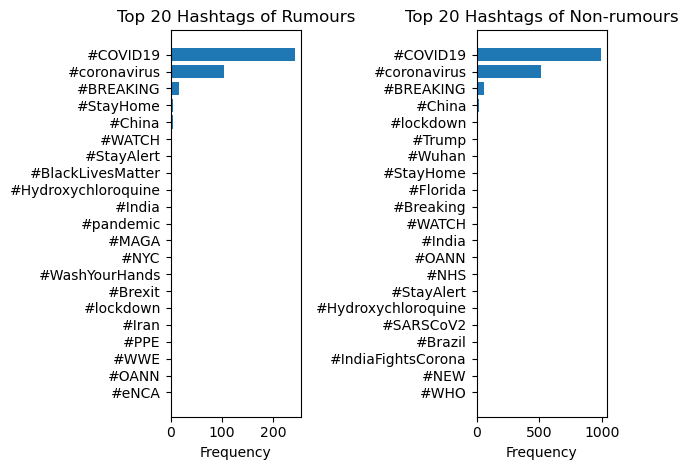

In [358]:
import matplotlib.pyplot as plt
import numpy as np
# Fixing random state for reproducibility
# np.random.seed(0)

hashtags_top_k_r = []
hashtags_top_v_r = []
x = 0
for k, v in hashtags_count_covid_r.items():#hashtags_count_sorted_r
    hashtags_top_k_r.append('#'+k)
    hashtags_top_v_r.append(v)
    x+=1
    if x>20:
        break
hashtags_top_k_nr = []
hashtags_top_v_nr = []
x = 0
for k, v in hashtags_count_covid_nr.items():#hashtags_count_sorted_nr
    hashtags_top_k_nr.append('#'+k)
    hashtags_top_v_nr.append(v)
    x+=1
    if x>20:
        break



plt.rcdefaults()
fig, axs = plt.subplots(1, 2, tight_layout=True)

y_pos = np.arange(len(hashtags_top_k_r))
axs[0].barh(y_pos, hashtags_top_v_r)#, xerr=error, align='center'
axs[0].set_yticks(y_pos, labels=hashtags_top_k_r)
axs[0].invert_yaxis()  # labels read top-to-bottom
axs[0].set_xlabel('Frequency')
axs[0].set_title('Top 20 Hashtags of Rumours')

y_pos = np.arange(len(hashtags_top_k_nr))
axs[1].barh(y_pos, hashtags_top_v_nr)#, xerr=error, align='center'
axs[1].set_yticks(y_pos, labels=hashtags_top_k_nr)
axs[1].invert_yaxis()  # labels read top-to-bottom
axs[1].set_xlabel('Frequency')
axs[1].set_title('Top 20 Hashtags of Non-rumours')

plt.savefig("figures/Top20Hashtags_new.png", bbox_inches="tight")
plt.show()

In [1]:
# import nltk
# nltk.download('all')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re
import emoji


tt = TweetTokenizer()
stopwords = set(stopwords.words('english')) # note: stopwords are all in lowercase

def clean_tweet(text):
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#', '', text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove URL, RT, mention(@)
    text = re.sub(r'http(\S)+', '', text)
    text = re.sub(r'http ...', '', text)
    text = re.sub(r'(RT|rt)[ ]*@[ ]*[\S]+', '', text)
    text = re.sub(r'RT[ ]?@', '', text)
    text = re.sub(r'@[\S]+', '', text)

    text = re.sub(r'&amp;?', 'and', text)
    text = re.sub(r'&lt;', '<', text)
    text = re.sub(r'&gt;', '>', text)

    # Remove emoji
    text = emoji.demojize(text)

    # Remove redundent whitespace (including new line characters)
    text = re.sub(r'\s\s+', '', text)
    text = re.sub(r'[ ]{2, }', '', text)
    
    tw_token = tt.tokenize(text)
    tw_token = [w.lower() for w in tw_token]
    tw_token = [w for w in tw_token if w.isalpha()]
#     tw_token = [w for w in tw_token if not w in stopwords]
    tw_token = ' '.join(tw_token)
    
    return tw_token



In [2]:
# import pandas as pd

# data_labeled = pd.read_csv('covid_data_labeled.csv')
# data_labeled

In [275]:
# # data cleaning
# import ast
# data_labeled_source = []
# data_labeled_reply = []
# x =0
# for i in range(data_labeled.shape[0]):
#     source_tw = data_labeled['source_tw'][i]
#     reply_tw = data_labeled['retweets'][i]
# #     reply_tw = reply_tw.strip('][').split(', ')
#     reply_tw = ast.literal_eval(reply_tw)
#     reply_tw = [s.strip() for s in reply_tw]
#     reply_tw = ' '.join(reply_tw)
#     source_tw = clean_tweet(source_tw)
#     reply_tw = clean_tweet(reply_tw)
#     data_labeled_source.append(source_tw)
#     data_labeled_reply.append(reply_tw)


# data_labeled['source_tw'] = data_labeled_source
# data_labeled['retweets'] = data_labeled_reply
# data_labeled


In [1]:
import pandas as pd

data_labeled = pd.read_csv('covid_data_labeled_cleaned.csv')
data_labeled

,source_id,source_tw,retweets,prediction
0,1272262651100434433,according to the new york times warner bros wa...,NaN,1.0
1,1287153210990395392,hurricane hanna has made landfall in storm is ...,guess what the cause of death is from a hurric...,0.0
2,1266555444283179008,monkeys on the loose in india with stolen coro...,NaN,0.0
3,1274338812173393920,if trump felt comfortable having it here then ...,coronavirus is very said of the coronavirus ri...,0.0
4,1278703879828303877,disturbing alabama officials say some students...,NaN,0.0
...,...,...,...,...
14605,1265804367497760776,breaking texas supreme court blocks expansion ...,NaN,1.0
14606,1263910958478635011,retweetfest tweet out the link below and we wi...,NaN,0.0
14607,1254498556775469062,imagine if trump displayed the same passion an...,the only way covid patients will get any benef...,1.0
14608,1264563884435869696,a second great clips hair stylist may have exp...,not great clips anymore covid is the transmiss...,0.0


In [2]:
tw_source = data_labeled.drop(columns=['retweets']).dropna().reset_index(drop=True)
tw_reply = data_labeled.drop(columns=['source_tw']).dropna().reset_index(drop=True)
print(len(tw_source))
print(len(tw_reply))
display(tw_source)
display(tw_reply)

14567
10935


,source_id,source_tw,prediction
0,1272262651100434433,according to the new york times warner bros wa...,1.0
1,1287153210990395392,hurricane hanna has made landfall in storm is ...,0.0
2,1266555444283179008,monkeys on the loose in india with stolen coro...,0.0
3,1274338812173393920,if trump felt comfortable having it here then ...,0.0
4,1278703879828303877,disturbing alabama officials say some students...,0.0
...,...,...,...
14562,1265804367497760776,breaking texas supreme court blocks expansion ...,1.0
14563,1263910958478635011,retweetfest tweet out the link below and we wi...,0.0
14564,1254498556775469062,imagine if trump displayed the same passion an...,1.0
14565,1264563884435869696,a second great clips hair stylist may have exp...,0.0


,source_id,retweets,prediction
0,1287153210990395392,guess what the cause of death is from a hurric...,0.0
1,1274338812173393920,coronavirus is very said of the coronavirus ri...,0.0
2,1249421782630772746,that is the dumbest tweet ive read throughout ...,1.0
3,1274091468890632192,it enough that brother died of covid really,0.0
4,1283500526450159616,covid must assist south africans here nd is ou...,0.0
...,...,...,...
10930,1281111264958259202,stop lying to people south africa s most popul...,0.0
10931,1271451511600697345,donald meet laurie you need to listen to her t...,0.0
10932,1238660083254472704,stupid the is for the number of disease they h...,0.0
10933,1254498556775469062,the only way covid patients will get any benef...,1.0


In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nrclex import NRCLex


sia_result_source = []
tb_result_source = []
nrc_result_source = []

col = 'source_tw'

for i in range(tw_source.shape[0]):
    sentence = tw_source[col][i]

    sia = SentimentIntensityAnalyzer()
    sia_sentiment = sia.polarity_scores(sentence)
    sia_result_source.append(sia_sentiment)

    tb = TextBlob(sentence)
    tb_sentiment = tb.sentiment
    tb_result_source.append(list(tb_sentiment))

    emotion = NRCLex(sentence)
    nrc_emotion = emotion.top_emotions
    nrc_result_source.append(nrc_emotion)


In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nrclex import NRCLex


sia_result_reply = []
tb_result_reply = []
nrc_result_reply = []

col = 'retweets'

for i in range(tw_reply.shape[0]):
    sentence = tw_reply[col][i]

    sia = SentimentIntensityAnalyzer()
    sia_sentiment = sia.polarity_scores(sentence)
    sia_result_reply.append(sia_sentiment)

    tb = TextBlob(sentence)
    tb_sentiment = tb.sentiment
    tb_result_reply.append(list(tb_sentiment))

    emotion = NRCLex(sentence)
    nrc_emotion = emotion.top_emotions
    nrc_result_reply.append(nrc_emotion)


In [5]:
print(len(sia_result_source))
print(len(tb_result_source))
print(len(nrc_result_source))
print(len(sia_result_reply))
print(len(tb_result_reply))
print(len(nrc_result_reply))

14567
14567
14567
10935
10935
10935


In [6]:
sia_result_source[:5]

[{'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'compound': -0.3182},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.379, 'neu': 0.621, 'pos': 0.0, 'compound': -0.6705},
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.8271},
 {'neg': 0.15, 'neu': 0.727, 'pos': 0.123, 'compound': -0.1531}]

In [7]:
# -1(most extreme negative) and +1 (most extreme positive)

import numpy


sia_result_source_compound_rumour = []
sia_result_source_compound_nonrumour = []
i = -1
for d in sia_result_source:
    i += 1
    if tw_source['prediction'][i] == 1:
        sia_result_source_compound_rumour.append(d['compound'])
    else:
        sia_result_source_compound_nonrumour.append(d['compound'])



In [8]:
# -1(most extreme negative) and +1 (most extreme positive)

import numpy


sia_result_reply_compound_rumour = []
sia_result_reply_compound_nonrumour = []
i = -1
for d in sia_result_reply:
    i += 1
    if tw_reply['prediction'][i] == 1:
        sia_result_reply_compound_rumour.append(d['compound'])
    else:
        sia_result_reply_compound_nonrumour.append(d['compound'])



In [9]:
sia_result_source_compound_rumour[0:5]

[-0.3182, 0.4019, -0.743, -0.0516, -0.3818]

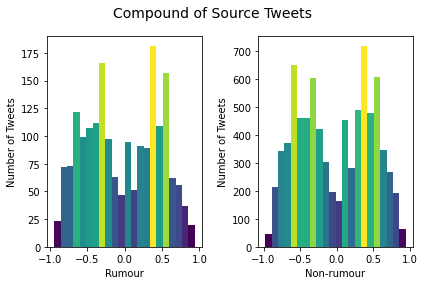

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


n_bins = 22

sia_result_compound_rumour = [v for v in sia_result_source_compound_rumour if v != 0]
sia_result_compound_nonrumour = [v for v in sia_result_source_compound_nonrumour if v != 0]

fig, axs = plt.subplots(1, 2, tight_layout=True)

N, bins, patches = axs[0].hist(sia_result_compound_rumour, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
N, bins, patches = axs[1].hist(sia_result_compound_nonrumour, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

axs[0].set(xlabel="Rumour", ylabel="Number of Tweets")
axs[1].set(xlabel="Non-rumour", ylabel="Number of Tweets")

# axs[0].legend()
# axs[1].legend()

plt.suptitle("Compound of Source Tweets", fontsize=14)
plt.savefig("figures/source/Compound_source.png", bbox_inches="tight")
plt.show()

In [10]:
import numpy


sia_result_source_rumour = {}
sia_result_source_nonrumour = {}
k_sentiment = ['neg', 'neu', 'pos']
for k in k_sentiment:
    sia_result_source_rumour[k] = 0
    sia_result_source_nonrumour[k] = 0


i = -1
for d in sia_result_source:
    i += 1
    d['compound'] = 0
    max_k = max(d, key=d.get)
    if tw_source['prediction'][i] == 1:
        sia_result_source_rumour[max_k] += 1
    else:
        sia_result_source_nonrumour[max_k] += 1
    
display(sia_result_source_rumour)
display(sia_result_source_nonrumour)
sia_result_source_rumour['neu'] = 0
sia_result_source_nonrumour['neu'] = 0
neg_percent_source_r = sia_result_source_rumour['neg']/sum(sia_result_source_rumour.values())
pos_percent_source_r = sia_result_source_rumour['pos']/sum(sia_result_source_rumour.values())
neg_percent_source_nr = sia_result_source_nonrumour['neg']/sum(sia_result_source_nonrumour.values())
pos_percent_source_nr = sia_result_source_nonrumour['pos']/sum(sia_result_source_nonrumour.values())
print(neg_percent_source_r)
print(pos_percent_source_r)
print(neg_percent_source_nr)
print(pos_percent_source_nr)


{'neg': 19, 'neu': 2765, 'pos': 14}

{'neg': 85, 'neu': 11627, 'pos': 57}

0.5757575757575758
0.42424242424242425
0.5985915492957746
0.4014084507042254


In [11]:
import numpy


sia_result_reply_rumour = {}
sia_result_reply_nonrumour = {}
k_sentiment = ['neg', 'neu', 'pos']
for k in k_sentiment:
    sia_result_reply_rumour[k] = 0
    sia_result_reply_nonrumour[k] = 0


i = -1
for d in sia_result_reply:
    i += 1
    d['compound'] = 0
    max_k = max(d, key=d.get)
    if tw_reply['prediction'][i] == 1:
        sia_result_reply_rumour[max_k] += 1
    else:
        sia_result_reply_nonrumour[max_k] += 1
    
display(sia_result_reply_rumour)
display(sia_result_reply_nonrumour)
sia_result_reply_rumour['neu'] = 0
sia_result_reply_nonrumour['neu'] = 0
neg_percent_reply_r = sia_result_reply_rumour['neg']/sum(sia_result_reply_rumour.values())
pos_percent_reply_r = sia_result_reply_rumour['pos']/sum(sia_result_reply_rumour.values())
neg_percent_reply_nr = sia_result_reply_nonrumour['neg']/sum(sia_result_reply_nonrumour.values())
pos_percent_reply_nr = sia_result_reply_nonrumour['pos']/sum(sia_result_reply_nonrumour.values())
print(neg_percent_reply_r)
print(pos_percent_reply_r)
print(neg_percent_reply_nr)
print(pos_percent_reply_nr)


{'neg': 18, 'neu': 2080, 'pos': 13}

{'neg': 63, 'neu': 8707, 'pos': 54}

0.5806451612903226
0.41935483870967744
0.5384615384615384
0.46153846153846156


In [25]:

neg_percent_source_r = float("{:.3f}".format(neg_percent_source_r))
pos_percent_source_r = float("{:.3f}".format(pos_percent_source_r))
neg_percent_source_nr = float("{:.3f}".format(neg_percent_source_nr))
pos_percent_source_nr = float("{:.3f}".format(pos_percent_source_nr))

neg_percent_reply_r = float("{:.3f}".format(neg_percent_reply_r))
pos_percent_reply_r = float("{:.3f}".format(pos_percent_reply_r))
neg_percent_reply_nr = float("{:.3f}".format(neg_percent_reply_nr))
pos_percent_reply_nr = float("{:.3f}".format(pos_percent_reply_nr))


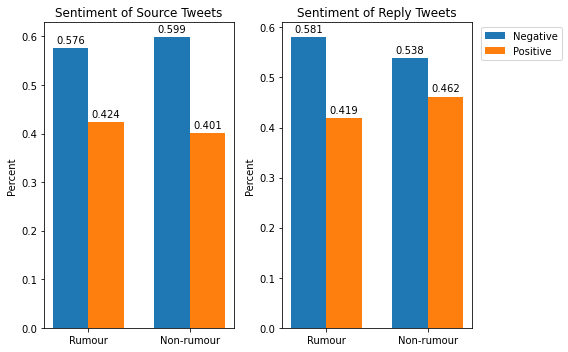

In [39]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(8,5))

labels = ['Rumour', 'Non-rumour']
neg_percent = [neg_percent_source_r, neg_percent_source_nr]
pos_percent = [pos_percent_source_r, pos_percent_source_nr]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
rects1 = axs[0].bar(x - width/2, neg_percent, width, label='Negative')
rects2 = axs[0].bar(x + width/2, pos_percent, width, label='Positive')
# Add some text for labels, title and custom x-axis tick labels, etc.
axs[0].set_ylabel('Percent')
axs[0].set_title('Sentiment of Source Tweets')
axs[0].set_xticks(x, labels)
# axs[0].legend()
axs[0].bar_label(rects1, padding=3)
axs[0].bar_label(rects2, padding=3)

labels = ['Rumour', 'Non-rumour']
neg_percent = [neg_percent_reply_r, neg_percent_reply_nr]
pos_percent = [pos_percent_reply_r, pos_percent_reply_nr]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
rects1 = axs[1].bar(x - width/2, neg_percent, width, label='Negative')
rects2 = axs[1].bar(x + width/2, pos_percent, width, label='Positive')
# Add some text for labels, title and custom x-axis tick labels, etc.
axs[1].set_ylabel('Percent')
axs[1].set_title('Sentiment of Reply Tweets')
axs[1].set_xticks(x, labels)
axs[1].legend(bbox_to_anchor=(1.5,1))
axs[1].bar_label(rects1, padding=3)
axs[1].bar_label(rects2, padding=3)


fig.tight_layout()

plt.savefig("figures/PositiveNegativeSentiment.png", bbox_inches="tight")
plt.show()

In [28]:
tb_result_source[:5]

[[0.005681818181818177, 0.4147727272727273],
 [0.0, 0.0],
 [-0.07692307692307693, 0.2692307692307692],
 [0.4, 0.8],
 [-0.5, 0.8]]

In [31]:
# polarity  -1 negative 1 positive
# subjectivity 0.0 objective statement 1 subjective statement.


import numpy as np


tb_result_source_rumour = []
tb_result_source_nonrumour = []
for i in range(len(tb_result_source)):
    if data_labeled['prediction'][i] == 1:
        tb_result_source_rumour.append(tb_result_source[i])
    else:
        tb_result_source_nonrumour.append(tb_result_source[i])

def statistic_sum(tb_result_x):
    tb_result_np = np.array(tb_result_x)
    tb_result_polarity = tb_result_np[:, 0]
    tb_result_subjectivity = tb_result_np[:, 1]

    results = {}
    results['tb_result_polarity_avg'] = np.average(tb_result_polarity)
    results['tb_result_polarity_50'] = np.percentile(tb_result_polarity, 50)
    results['tb_result_polarity_80'] = np.percentile(tb_result_polarity, 80)

    results['tb_result_subjectivity_avg'] = np.average(tb_result_subjectivity)
    results['tb_result_subjectivity_50'] = np.percentile(tb_result_subjectivity, 50)
    results['tb_result_subjectivity_80'] = np.percentile(tb_result_subjectivity, 80)
    
    return results

rumour_results_source = statistic_sum(tb_result_source_rumour)
nonrumour_results_source = statistic_sum(tb_result_source_nonrumour)


print(rumour_results_source)
print(nonrumour_results_source)



{'tb_result_polarity_avg': 0.05764591788796862, 'tb_result_polarity_50': 0.0, 'tb_result_polarity_80': 0.2094444444444447, 'tb_result_subjectivity_avg': 0.31605181131440513, 'tb_result_subjectivity_50': 0.3, 'tb_result_subjectivity_80': 0.55}
{'tb_result_polarity_avg': 0.054958719113662596, 'tb_result_polarity_50': 0.0, 'tb_result_polarity_80': 0.2, 'tb_result_subjectivity_avg': 0.311529564641319, 'tb_result_subjectivity_50': 0.3, 'tb_result_subjectivity_80': 0.55}


In [32]:
# polarity  -1 negative 1 positive
# subjectivity 0.0 objective statement 1 subjective statement.


import numpy as np


tb_result_reply_rumour = []
tb_result_reply_nonrumour = []
for i in range(len(tb_result_reply)):
    if data_labeled['prediction'][i] == 1:
        tb_result_reply_rumour.append(tb_result_reply[i])
    else:
        tb_result_reply_nonrumour.append(tb_result_reply[i])
        
def statistic_sum(tb_result_x):
    tb_result_np = np.array(tb_result_x)
    tb_result_polarity = tb_result_np[:, 0]
    tb_result_subjectivity = tb_result_np[:, 1]

    results = {}
    results['tb_result_polarity_avg'] = np.average(tb_result_polarity)
    results['tb_result_polarity_50'] = np.percentile(tb_result_polarity, 50)
    results['tb_result_polarity_80'] = np.percentile(tb_result_polarity, 80)

    results['tb_result_subjectivity_avg'] = np.average(tb_result_subjectivity)
    results['tb_result_subjectivity_50'] = np.percentile(tb_result_subjectivity, 50)
    results['tb_result_subjectivity_80'] = np.percentile(tb_result_subjectivity, 80)
    
    return results

rumour_results_reply = statistic_sum(tb_result_reply_rumour)
nonrumour_results_reply = statistic_sum(tb_result_reply_nonrumour)


print(rumour_results_reply)
print(nonrumour_results_reply)

{'tb_result_polarity_avg': 0.052687092610340325, 'tb_result_polarity_50': 0.0, 'tb_result_polarity_80': 0.2, 'tb_result_subjectivity_avg': 0.40885624109478713, 'tb_result_subjectivity_50': 0.4375, 'tb_result_subjectivity_80': 0.6194285714285716}
{'tb_result_polarity_avg': 0.04959277822083198, 'tb_result_polarity_50': 0.0, 'tb_result_polarity_80': 0.20333333333333337, 'tb_result_subjectivity_avg': 0.4108679320338474, 'tb_result_subjectivity_50': 0.45, 'tb_result_subjectivity_80': 0.625}


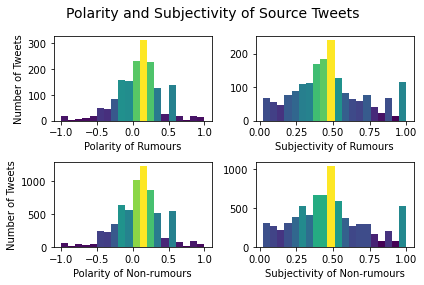

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


n_bins = 20


# Generate two normal distributions
tb_result_source_rumour_np = np.array(tb_result_source_rumour)
tb_result_source_polarity_r = tb_result_source_rumour_np[:, 0]
tb_result_source_subjectivity_r = tb_result_source_rumour_np[:, 1]
tb_result_source_polarity_r = [v for v in tb_result_source_polarity_r if v != 0]
tb_result_source_subjectivity_r = [v for v in tb_result_source_subjectivity_r if v != 0]

tb_result_source_nonrumour_np = np.array(tb_result_source_nonrumour)
tb_result_source_polarity_nr = tb_result_source_nonrumour_np[:, 0]
tb_result_source_subjectivity_nr = tb_result_source_nonrumour_np[:, 1]
tb_result_source_polarity_nr = [v for v in tb_result_source_polarity_nr if v != 0]
tb_result_source_subjectivity_nr = [v for v in tb_result_source_subjectivity_nr if v != 0]


fig, axs = plt.subplots(2, 2, tight_layout=True)#(1, 2, tight_layout=True)


N, bins, patches = axs[0][0].hist(tb_result_source_polarity_r, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
N, bins, patches = axs[0][1].hist(tb_result_source_subjectivity_r, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

N, bins, patches = axs[1][0].hist(tb_result_source_polarity_nr, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
N, bins, patches = axs[1][1].hist(tb_result_source_subjectivity_nr, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)


axs[0][0].set(xlabel="Polarity of Rumours", ylabel="Number of Tweets")
axs[0][1].set(xlabel="Subjectivity of Rumours")
axs[1][0].set(xlabel="Polarity of Non-rumours", ylabel="Number of Tweets")
axs[1][1].set(xlabel="Subjectivity of Non-rumours")


plt.suptitle("Polarity and Subjectivity of Source Tweets", fontsize=14)
plt.savefig("figures/source/Polarity_Subjectivity_source.png", bbox_inches="tight")


plt.show()

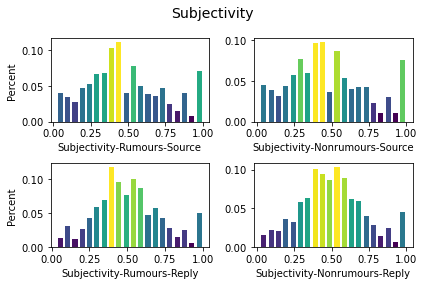

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter


n_bins = 20


tb_result_source_rumour_np = np.array(tb_result_source_rumour)
tb_result_source_subjectivity_r = tb_result_source_rumour_np[:, 1]
tb_result_source_subjectivity_r = [v for v in tb_result_source_subjectivity_r if v != 0]
tb_result_source_subjectivity_r = [v for v in tb_result_source_subjectivity_r if v != 0.5]

tb_result_source_nonrumour_np = np.array(tb_result_source_nonrumour)
tb_result_source_subjectivity_nr = tb_result_source_nonrumour_np[:, 1]
tb_result_source_subjectivity_nr = [v for v in tb_result_source_subjectivity_nr if v != 0]
tb_result_source_subjectivity_nr = [v for v in tb_result_source_subjectivity_nr if v != 0.5]


tb_result_reply_rumour_np = np.array(tb_result_reply_rumour)
tb_result_reply_subjectivity_r = tb_result_reply_rumour_np[:, 1]
tb_result_reply_subjectivity_r = [v for v in tb_result_reply_subjectivity_r if v != 0]
tb_result_reply_subjectivity_r = [v for v in tb_result_reply_subjectivity_r if v != 0.5]

tb_result_reply_nonrumour_np = np.array(tb_result_reply_nonrumour)
tb_result_reply_subjectivity_nr = tb_result_reply_nonrumour_np[:, 1]
tb_result_reply_subjectivity_nr = [v for v in tb_result_reply_subjectivity_nr if v != 0]
tb_result_reply_subjectivity_nr = [v for v in tb_result_reply_subjectivity_nr if v != 0.5]


fig, axs = plt.subplots(2, 2, tight_layout=True)

hist, bins = np.histogram(tb_result_source_subjectivity_r, bins=n_bins)
hist = hist / hist.sum()
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
patches = axs[0][0].bar(center, hist, align='center', width=width)
fracs = hist / hist.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

hist, bins = np.histogram(tb_result_source_subjectivity_nr, bins=n_bins)
hist = hist / hist.sum()
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
patches = axs[0][1].bar(center, hist, align='center', width=width)
fracs = hist / hist.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

hist, bins = np.histogram(tb_result_reply_subjectivity_r, bins=n_bins)
hist = hist / hist.sum()
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
patches = axs[1][0].bar(center, hist, align='center', width=width)
fracs = hist / hist.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

hist, bins = np.histogram(tb_result_reply_subjectivity_nr, bins=n_bins)
hist = hist / hist.sum()
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
patches = axs[1][1].bar(center, hist, align='center', width=width)
fracs = hist / hist.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)


axs[0][0].set(xlabel="Subjectivity-Rumours-Source", ylabel="Percent")
axs[0][1].set(xlabel="Subjectivity-Nonrumours-Source")
axs[1][0].set(xlabel="Subjectivity-Rumours-Reply", ylabel="Percent")
axs[1][1].set(xlabel="Subjectivity-Nonrumours-Reply")


plt.suptitle("Subjectivity", fontsize=14)
plt.savefig("figures/Subjectivity.png", bbox_inches="tight")


plt.show()

In [22]:
nrc_result = nrc_result_source
nrc_result[:5]

[[('fear', 0.2),
  ('anger', 0.2),
  ('negative', 0.2),
  ('sadness', 0.2),
  ('disgust', 0.2)],
 [('negative', 0.4)],
 [('anger', 0.5), ('negative', 0.5)],
 [('trust', 0.25), ('surprise', 0.25), ('positive', 0.25), ('joy', 0.25)],
 [('surprise', 1.0)]]

In [23]:

nrc_result_rumour = {}
nrc_result_nonrumour = {}
k_emotions = ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']
for k in k_emotions:
    nrc_result_rumour[k] = 0
    nrc_result_nonrumour[k] = 0

i = -1
for r in nrc_result:
    i += 1
    for (e, p) in r:
        if p != 0:
            if data_labeled['prediction'][i] == 1:
                nrc_result_rumour[e] += 1
            else:
                nrc_result_nonrumour[e] += 1

print(nrc_result_rumour)
print(nrc_result_nonrumour)

{'fear': 583, 'anger': 293, 'anticipation': 465, 'trust': 770, 'surprise': 334, 'positive': 1216, 'negative': 946, 'sadness': 335, 'disgust': 163, 'joy': 220}
{'fear': 2398, 'anger': 1042, 'anticipation': 1828, 'trust': 3146, 'surprise': 1367, 'positive': 5006, 'negative': 3970, 'sadness': 1602, 'disgust': 646, 'joy': 797}


In [24]:
import matplotlib.pyplot as plt
import numpy as np


nrc_result_rumour = nrc_result_source_rumour
emotion_k = list(nrc_result_rumour.keys())
emotion_v = list(nrc_result_rumour.values())
instance_sum = sum(emotion_v)
emotion_v = [x/instance_sum for x in emotion_v]


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(emotion_k))
data = emotion_v

ax.barh(y_pos, data)#, xerr=error, align='center'
ax.set_yticks(y_pos, labels=emotion_k)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage of Emotions')
ax.set_title('Emotions of Rumours')

plt.savefig("figures/source/Percentage_of_Emotions_Rumours.png", bbox_inches="tight")
plt.show()

In [25]:
import matplotlib.pyplot as plt

nrc_result_rumour = nrc_result_source_rumour
emotion_k = list(nrc_result_rumour.keys())
emotion_v = list(nrc_result_rumour.values())

plt.pie(emotion_v, labels = emotion_k)
plt.legend(title = "Emotions:", bbox_to_anchor=(1.5,0.5), loc="center right")

plt.savefig("figures/source/Emotions_of_Rumours.png", bbox_inches="tight")
plt.show()

In [26]:
import matplotlib.pyplot as plt
import numpy as np


nrc_result_nonrumour = nrc_result_source_nonrumour
emotion_k = list(nrc_result_nonrumour.keys())
emotion_v = list(nrc_result_nonrumour.values())
instance_sum = sum(emotion_v)
emotion_v = [x/instance_sum for x in emotion_v]
# display(emotion_k)
# display(emotion_v)

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(emotion_k))
data = emotion_v

ax.barh(y_pos, data)#, xerr=error, align='center'
ax.set_yticks(y_pos, labels=emotion_k)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage of Emotions')
ax.set_title('Emotions of Non-rumours')

plt.savefig("figures/source/Percentage_of_Emotions_NonRumours.png", bbox_inches="tight")
plt.show()

In [27]:
import matplotlib.pyplot as plt


nrc_result_nonrumour = nrc_result_source_nonrumour
emotion_k = list(nrc_result_nonrumour.keys())
emotion_v = list(nrc_result_nonrumour.values())


plt.pie(emotion_v, labels = emotion_k)
plt.legend(title = "Emotions:", bbox_to_anchor=(1.5,0.5), loc="center right")

plt.savefig("figures/source/Emotions_of_NonRumours.png", bbox_inches="tight")
plt.show()